In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
# Importing dataset

dataset = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Naive Bayes/Assignment/NB_Car_Ad.csv')

In [3]:
# Checking rows and shape in dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.shape

(400, 5)

In [5]:
# Features in dataset
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
# Info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# Checking for null values
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There are no null values

In [8]:
# Checking for duplicate values
dataset.duplicated().sum()

0

There are no duplicate values

In [9]:
# Removing irrelevant data
dataset.drop(['User ID'],inplace=True,axis=1)

In [10]:
# Converting Gender feature to numerical datatype
dataset.Gender = dataset.Gender.map({'Male':1,'Female':0})

<AxesSubplot:xlabel='Gender', ylabel='count'>

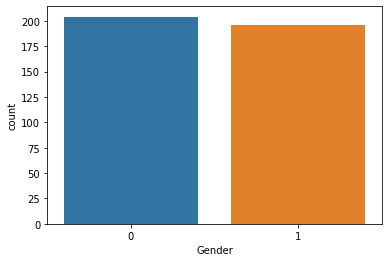

In [11]:
# Countplot 
sns.countplot(dataset.Gender)

We have same proportion of males and females in the dataset

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

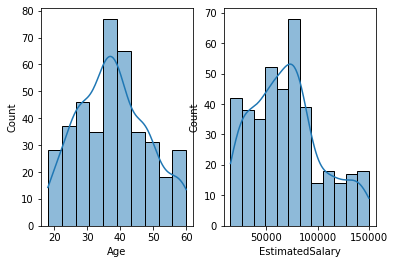

In [12]:
# Histogram

plt.subplot(1,2,1)
sns.histplot(dataset.Age,kde=1)

plt.subplot(1,2,2)
sns.histplot(dataset.EstimatedSalary,kde=1)

<AxesSubplot:xlabel='EstimatedSalary'>

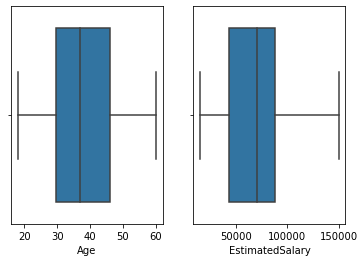

In [13]:
# Boxplot for outliers

plt.subplot(1,2,1)
sns.boxplot(dataset.Age)

plt.subplot(1,2,2)
sns.boxplot(dataset.EstimatedSalary)

There are no outliers in the dataset

In [14]:
# Distribution of Gender according to Purchased
dataset.Gender.groupby(dataset.Purchased).value_counts()

Purchased  Gender
0          1         130
           0         127
1          0          77
           1          66
Name: Gender, dtype: int64

In [15]:
# Splitting independent and dependent features
X = dataset.iloc[:,:-1]
Y = dataset.Purchased

In [16]:
# Using train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
X.shape, X_train.shape , X_test.shape

((400, 3), (320, 3), (80, 3))

In [18]:
# Standardizing the model 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
ss_x_test = pd.DataFrame(ss.transform(X_test),columns = X_test.columns)

In [19]:
# Using Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.75)

# Fitting the model to train data set
bnb.fit(ss_x_train,y_train)

BernoulliNB(alpha=0.75)

In [20]:
# Predicting the salary using model

yhat = bnb.predict(ss_x_test)

In [21]:
# Checking Testing data accuracy score

from sklearn.metrics import accuracy_score
print('Testing Accuracy Score: {} %'.format(accuracy_score(y_test,yhat)*100))

Testing Accuracy Score: 72.5 %


In [22]:
# Confusion Matrix for testing data

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test,yhat), 
                  columns=['Predicted Positive', 'Predicted Negative'], 
                  index= ['Actual Positive','Actual Negative'])
cm

,Predicted Positive,Predicted Negative
Actual Positive,45,10
Actual Negative,12,13


In [23]:
# Checking Training data accuracy score for overfitting

yhat_train = bnb.predict(ss_x_train)

from sklearn.metrics import accuracy_score
print('Training Accuracy Score: {} %'.format(accuracy_score(y_train,yhat_train)*100))

Training Accuracy Score: 75.0 %


Accuracy for train and test data is almost equal , hence the model fits perfectly

In [24]:
# Confusion Matrix for training data

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,yhat_train)

array([[161,  41],
       [ 39,  79]], dtype=int64)

In [25]:
# Model Performance

TP = cm.iloc[0,0]
TN = cm.iloc[1,1]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]

accuracy = (TP + TN) / float(TP + TN + FP + FN) ; print('accuracy : {:0.3f} %'.format(accuracy*100))
error = (FP + FN) / float(TP + TN + FP + FN) ; print('error : {:0.3f} %'.format(error*100))

precision = TP / float(TP + FP) ; print('precision : {:0.3f} %'.format(precision*100))
recall = TP / float(TP + FN) ; print('recall : {:0.3f} %'.format(recall*100))
specificity = TN / (TN + FP) ; print('specificity : {:0.3f} %'.format(specificity*100))

accuracy : 72.500 %
error : 27.500 %
precision : 81.818 %
recall : 78.947 %
specificity : 56.522 %


In [26]:
# Predicting the probability of being purchased

prob_y = pd.DataFrame(data=bnb.predict_proba(ss_x_test)[0:10], columns=['Prob of not purchased', 'Prob of purchased'])
prob_y

,Prob of not purchased,Prob of purchased
0,0.265035,0.734965
1,0.519958,0.480042
2,0.499108,0.500892
3,0.920796,0.079204
4,0.807961,0.192039
5,0.281604,0.718396
6,0.519958,0.480042
7,0.914493,0.085507
8,0.499108,0.500892
9,0.914493,0.085507


###### The above gives the probability whether the car will be puchased or not.
    Eg. In first row probability of not purchased is 0.26 and probability of purchased is 0.735
        It concludes the car will be purchased